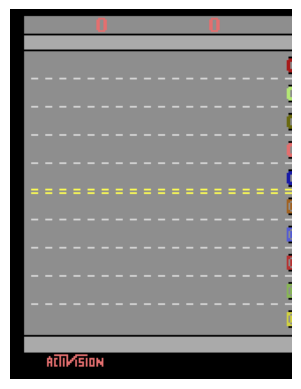

should be different:  144780
---clone---


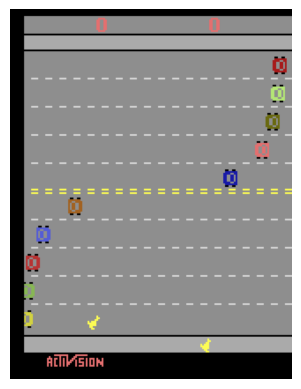

---end---
should be 0:  289512


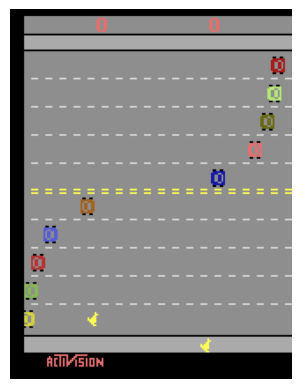

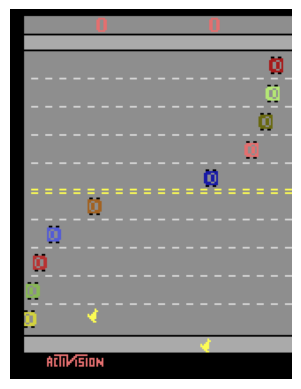

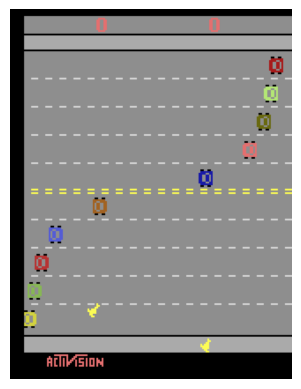

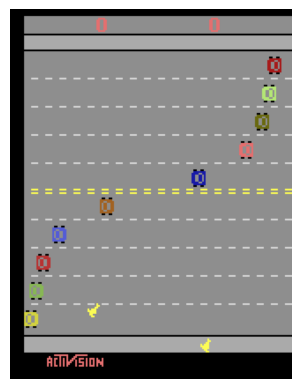

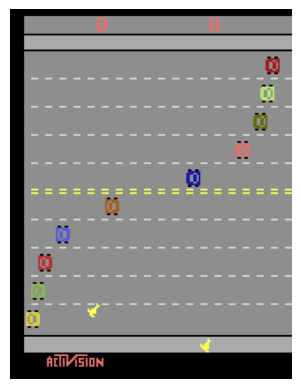

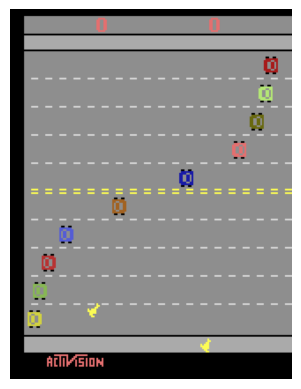

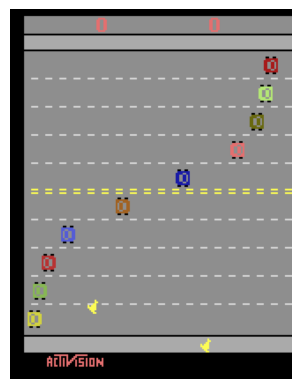

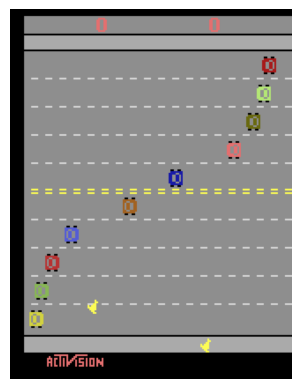

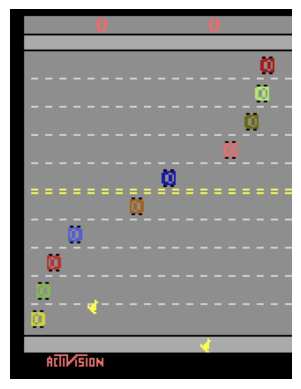

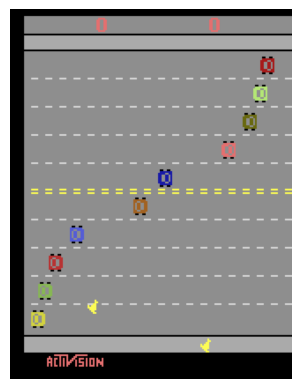

restore


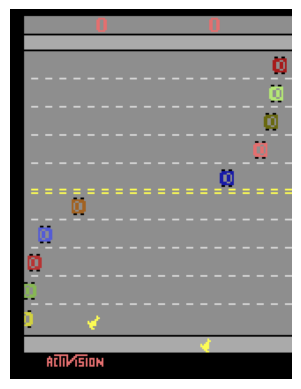

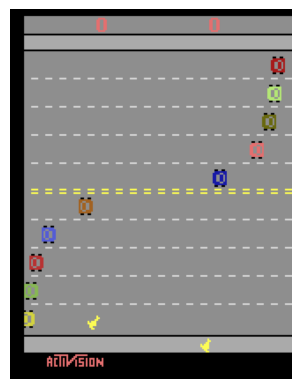

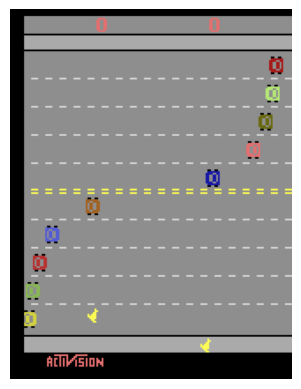

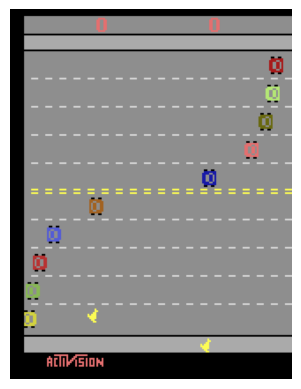

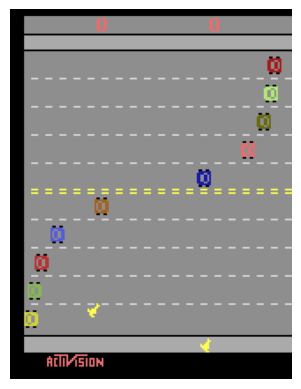

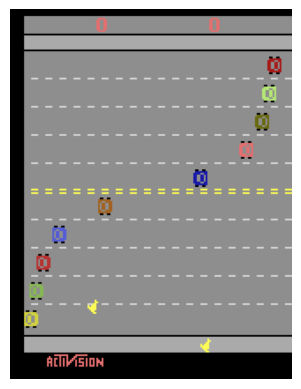

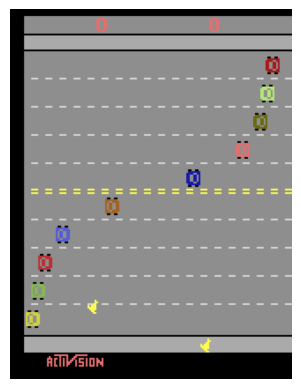

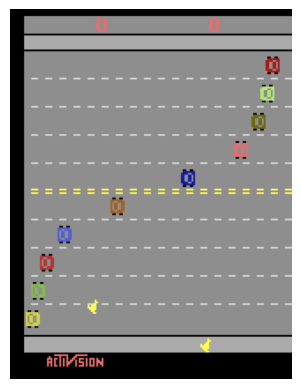

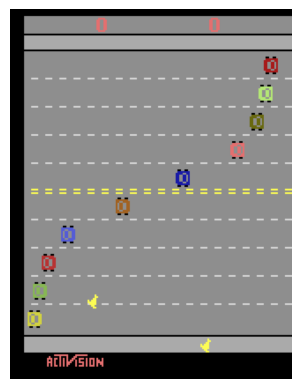

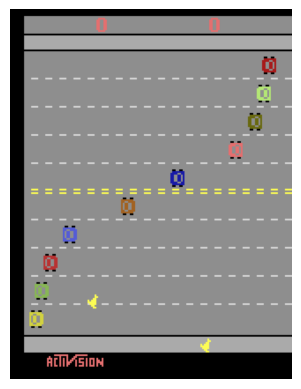

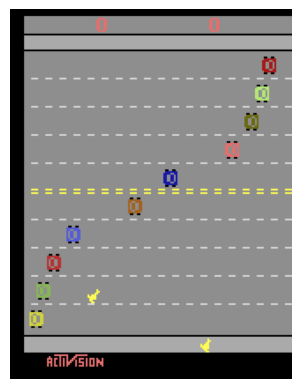

restore


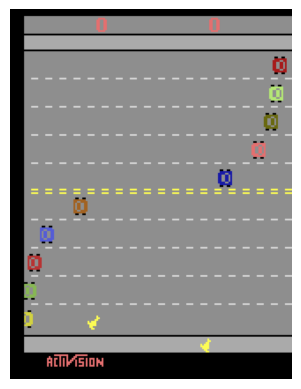

should be 0:  291484


In [1]:
import gym
from functools import partial
import numpy as np
import sys
import os


# env_name = sys.argv[1] + '-v0'
env_name = "Freeway-v0"

import matplotlib.pyplot as plt

def visualize_rgb_array(rgb_array):
    """
    Visualizes an RGB numpy array as an image.
    
    Parameters:
        rgb_array (numpy.ndarray): A numpy array representing an RGB image.
    """
    plt.imshow(rgb_array)
    plt.axis('off')  # Hide axis for better visualization
    plt.show()


AVERAGE_OVER_LAST_EP = 0.05

def make_delayed_env(env_name):
    env = gym.make(env_name)
    env.reset()
    
    tmp = env.ale.getScreenRGB2().copy()
    visualize_rgb_array(tmp)
    
    
    obs, _, _, _ = env.step(1)
    obs2, _, _, _ = env.step(0)
    
    obs = env.ale.getScreenRGB2()
    for _ in range(10):
        env.step(np.random.choice([0, 1]))
        # visualize_rgb_array(env.ale.getScreenRGB2())
    # visualize_rgb_array(obs)
    print("should be different: ", abs(tmp - obs).sum())
    # print("should be different: ", abs(tmp - obs).sum())
    print("---clone---")
    clone_state = env.clone_state()
    visualize_rgb_array(env.ale.getScreenRGB2())
    print("---end---")
    # env.restore_state(clone_state)
    # print("should be 0", abs(clone_state - np.array(env.clone_state())).sum())
    obs = env.ale.getScreenRGB2()
    print("should be 0: ", abs(tmp - obs).sum())
    obs3, _, _, _ = env.step(1)
    # print("should be 0: ", abs(obs - obs3).sum())
    obs4, _, _, _ = env.step(0)
    # print("should be 0: ", abs(obs2 - obs4).sum())
    for _ in range(10):
        env.step(np.random.choice([0,1]))
        visualize_rgb_array(env.ale.getScreenRGB2())
        
    print("restore")
    env.restore_state(clone_state)
    env.step(0)
    visualize_rgb_array(env.ale.getScreenRGB2())
    
    for _ in range(10):
        env.step(np.random.choice([0,1]))
        visualize_rgb_array(env.ale.getScreenRGB2())
        
    print("restore")
    env.restore_state(clone_state)
    env.step(0)
    visualize_rgb_array(env.ale.getScreenRGB2())
    
    
    obs = env.ale.getScreenRGB2()
    print("should be 0: ", abs(tmp - obs).sum())
    
make_delayed_env(env_name)

In [2]:
from stable_baselines.common.atari_wrappers import make_atari, DelayWrapper, MaxAndSkipEnv, wrap_deepmind
def make_delayed_env(env_name):
    env = gym.make(env_name)
    # env = wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=True, scale=True, sticky_action = 0.)
    env.reset()
    for i in range(10000):
        clone = env.clone_state()
        for _ in range(0):
            env.step(np.random.choice([0,1]))
        env.restore_state(clone)
            
        ns, rew, done, info = env.step(np.random.choice([0,1]))
        # visualize_rgb_array(env.ale.getScreenRGB2())
        # print(rew, done)
        if done:
            env.reset()
            print("-----done------", i)
            break
        
    # print("restore")
    # env.restore_state(clone_state)
    # env.step(0)
    # visualize_rgb_array(env.ale.getScreenRGB2())
    # obs = env.ale.getScreenRGB2()
    # print("should be 0: ", abs(tmp - obs).sum())
    
make_delayed_env(env_name)

/home/zhiyuan/anaconda3/envs/rl_delay_atari/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhiyuan/anaconda3/envs/rl_delay_atari/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhiyuan/anaconda3/envs/rl_delay_atari/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhiyuan/anaco

-----done------ 2742
